In [2]:
# Imports

import pandas as pd
from pandas import Series,DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#More imports for machine learning:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
#Load data
rossmann_df  = pd.read_csv(".../Kaggle/Rossmann/train.csv")
store_df     = pd.read_csv(".../Kaggle/Rossmann/store.csv")
test_df      = pd.read_csv(".../Kaggle/Rossmann/test.csv")

#Preview the data
rossmann_df.head()

C:\Users\ejohnson\AppData\Local\Continuum\Anaconda33\lib\site-packages\IPython\core\interactiveshell.py:2902: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
#Print data types
rossmann_df.info()
print("-------")
store_df.info()
print("-------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 77.6+ MB
-------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2Since

In [5]:
#Prepping the date data--

# This creates both Year and Month columns for both the train and test files:
rossmann_df['Year']  = rossmann_df['Date'].apply(lambda x: int(str(x)[:4]))
rossmann_df['Month'] = rossmann_df['Date'].apply(lambda x: int(str(x)[5:7]))

test_df['Year']  = test_df['Date'].apply(lambda x: int(str(x)[:4]))
test_df['Month'] = test_df['Date'].apply(lambda x: int(str(x)[5:7]))



In [6]:
#Date prep continued--change Date column to Date(Year-Month) instead of (Year-Month-Day)

rossmann_df['Date'] = rossmann_df['Date'].apply(lambda x: (str(x)[:7]))
test_df['Date']     = test_df['Date'].apply(lambda x: (str(x)[:7]))


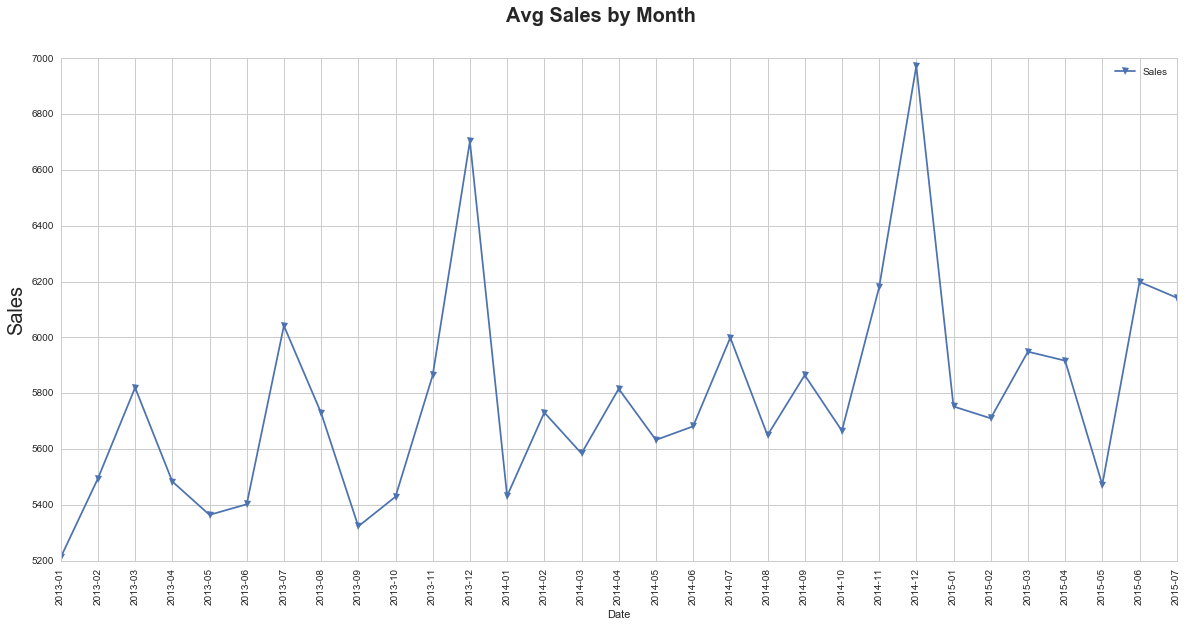

In [7]:
#Group by date to get average sales by date, and % change in sales
average_sales = rossmann_df.groupby('Date')["Sales"].mean()

#fig, (axis1,axis2) = plt.subplots(2,1,figsize=(20,9))
fig, (axis1) = plt.subplots(1,1,figsize=(20,9))
fig.suptitle('Avg Sales by Month', fontsize=20, fontweight='bold')
axis1.set_ylabel('Sales', fontsize=20)

# Plotting average sales over by month & year
ax1 = average_sales.plot(legend=True,ax=axis1,marker='v')
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(), rotation=90)


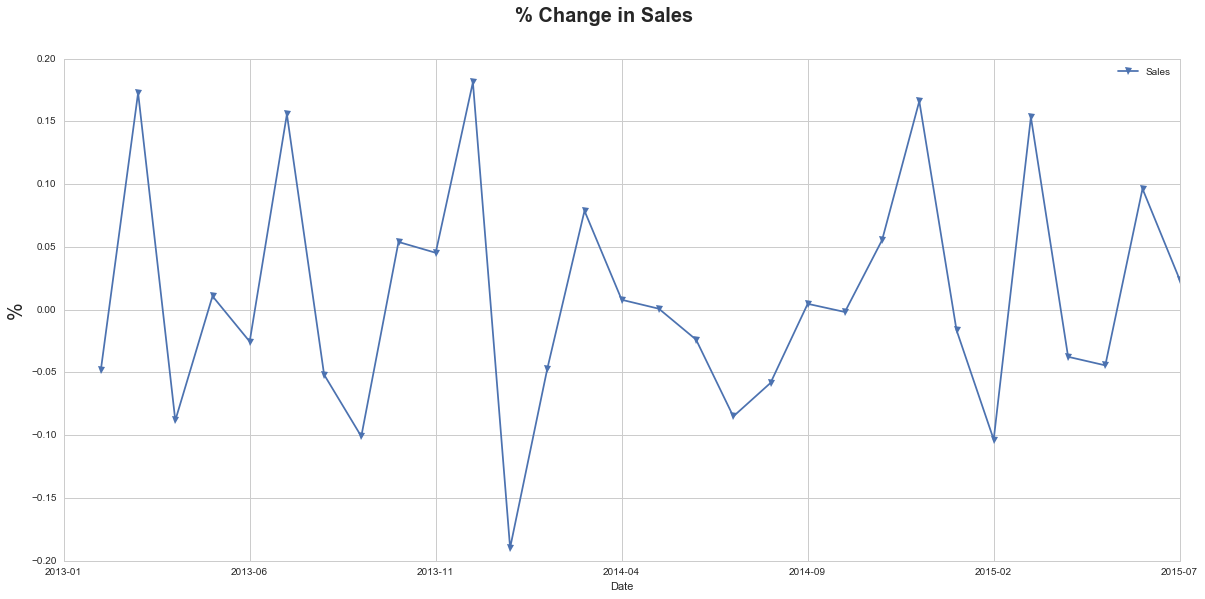

In [8]:
#Plotting % change for sales over month & year
pct_change_sales = rossmann_df.groupby('Date')["Sales"].sum().pct_change()
fig, (axis2) = plt.subplots(1,1,figsize=(20,9))
fig.suptitle('% Change in Sales', fontsize=20, fontweight='bold')
axis2.set_ylabel('%', fontsize=20)
ax2 = pct_change_sales.plot(legend=True,ax=axis2,marker='v')


In [9]:
# Using store_df
# Merge store_df with 2nd file: average store sales & customers

average_sales_customers = rossmann_df.groupby('Store')[["Sales", "Customers"]].mean()
sales_customers_df = DataFrame({'Store':average_sales_customers.index,
                      'Sales':average_sales_customers["Sales"], 'Customers': average_sales_customers["Customers"]}, 
                      columns=['Store', 'Sales', 'Customers'])
store_df = pd.merge(sales_customers_df, store_df, on='Store')

store_df.head()

,Store,Sales,Customers,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,3945.704883,467.646497,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,4122.991507,486.045648,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,5741.253715,620.286624,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,8021.769639,1100.057325,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,3867.110403,444.360934,a,a,29910,4,2015,0,NaN,NaN,NaN


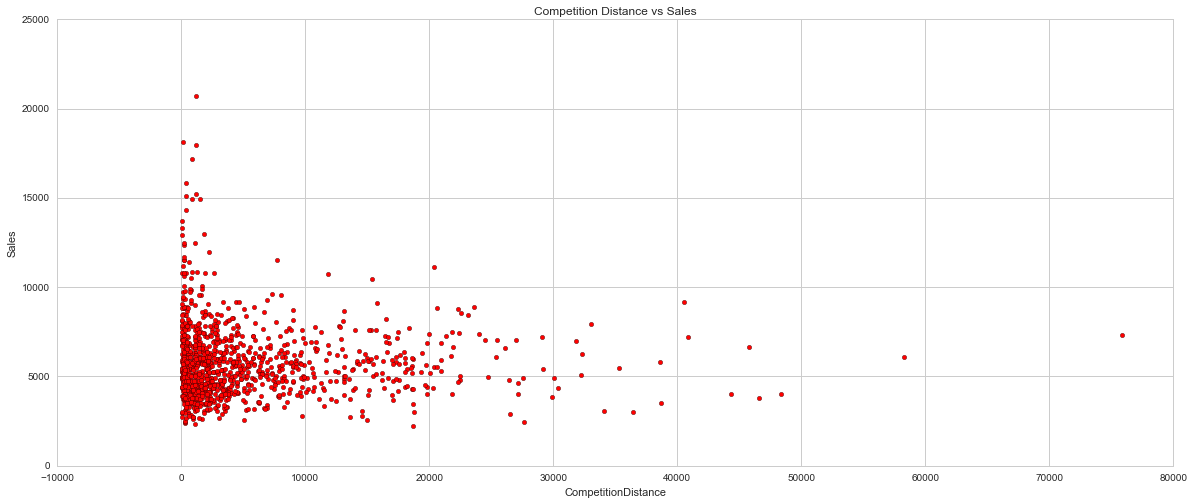

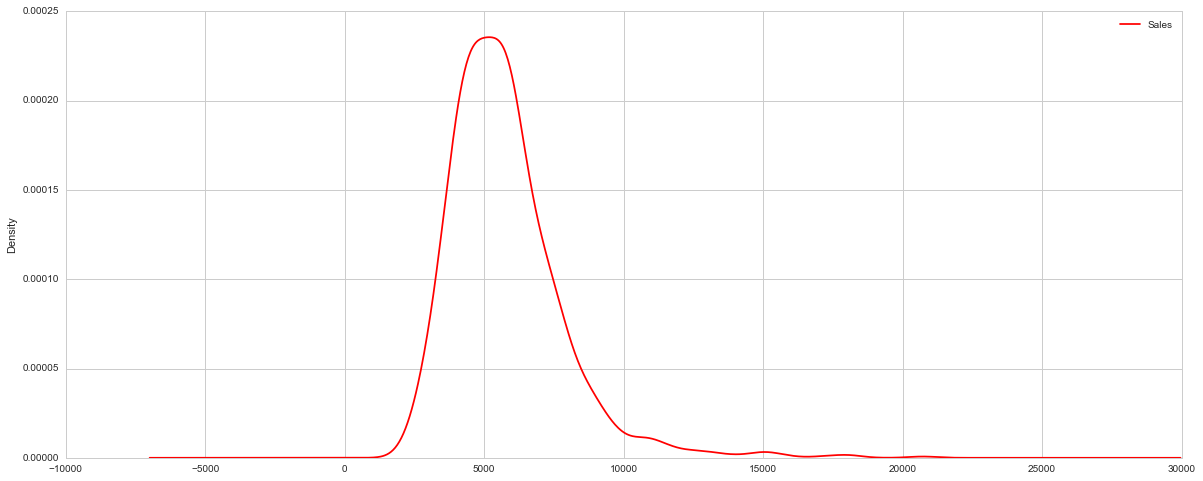

In [10]:
#How does competition distance affect sales?

#First fill NaN/null values
store_df["CompetitionDistance"].fillna(store_df["CompetitionDistance"].median())

# Plotting Competition Distance vs Sales
store_df.plot(kind='scatter',color='red',x='CompetitionDistance',y='Sales',title='Competition Distance vs Sales',fontsize=10,figsize=(20,8))
store_df.plot(kind='kde',color='red', x='CompetitionDistance',y='Sales',fontsize=10, figsize=(20,8))

In [11]:
# StateHoliday column has values 0 & "0", values need to be alike--changing 0 to "0"
rossmann_df["StateHoliday"].loc[rossmann_df["StateHoliday"] == 0] = "0"


C:\Users\ejohnson\AppData\Local\Continuum\Anaconda33\lib\site-packages\pandas\core\indexing.py:117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
#Data preview
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07,5263,555,1,1,0,1,2015,7
1,2,5,2015-07,6064,625,1,1,0,1,2015,7
2,3,5,2015-07,8314,821,1,1,0,1,2015,7
3,4,5,2015-07,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07,4822,559,1,1,0,1,2015,7


# What happened to the average sales of a store over time when competition started?
Example: the average sales for store_ids 52, 30, and 6 have clearly decreased since their competition started.


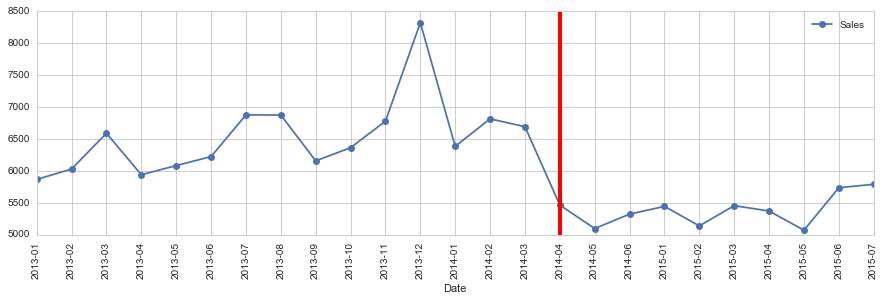

In [13]:
#Store 52
store_id = 52
store_data = rossmann_df[rossmann_df["Store"] == store_id]

average_store_sales = store_data.groupby('Date')["Sales"].mean()

# Get year & month when store competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

# Since all data of store sales given in rossmann_df starts with 2013-2015, the equation below checks if the year is >=2013 and 
#there are no null/NaN values in year & month columns.
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=4, color='red')

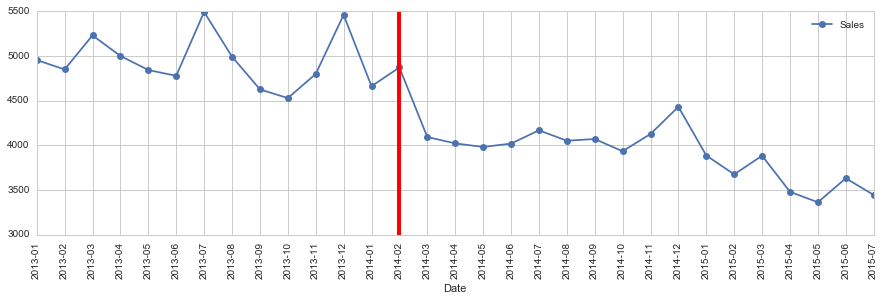

In [14]:
#Store 30

store_id = 30
store_data = rossmann_df[rossmann_df["Store"] == store_id]

average_store_sales = store_data.groupby('Date')["Sales"].mean()

# Get year & month when store competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

#See note above
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=4, color='red')

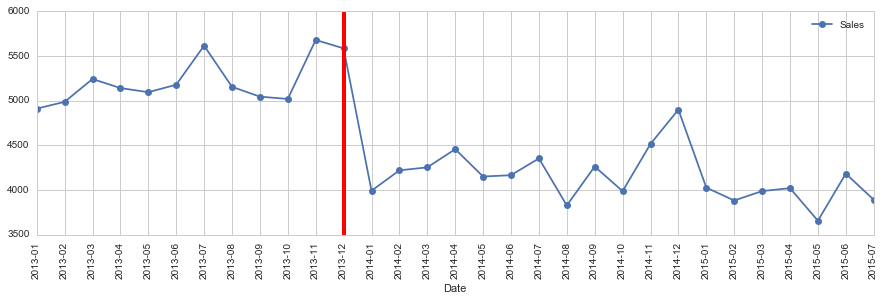

In [15]:
#Store 6

store_id = 6
store_data = rossmann_df[rossmann_df["Store"] == store_id]

average_store_sales = store_data.groupby('Date')["Sales"].mean()

# Get year & month when store competition started
y = store_df["CompetitionOpenSinceYear"].loc[store_df["Store"]  == store_id].values[0]
m = store_df["CompetitionOpenSinceMonth"].loc[store_df["Store"] == store_id].values[0]

# Plot 
ax = average_store_sales.plot(legend=True,figsize=(15,4),marker='o')
ax.set_xticks(range(len(average_store_sales)))
ax.set_xticklabels(average_store_sales.index.tolist(), rotation=90)

#See note above
if y >= 2013 and y == y and m == m:
    plt.axvline(x=((y-2013) * 12) + (m - 1), linewidth=4, color='red')

In [16]:
#Data preview
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
0,1,5,2015-07,5263,555,1,1,0,1,2015,7
1,2,5,2015-07,6064,625,1,1,0,1,2015,7
2,3,5,2015-07,8314,821,1,1,0,1,2015,7
3,4,5,2015-07,13995,1498,1,1,0,1,2015,7
4,5,5,2015-07,4822,559,1,1,0,1,2015,7


In [17]:
#Clean data for model:

# Test_df only has 2015, and only months 8 & 9

#Drop year and month
rossmann_df.drop(["Year", "Month"], axis=1, inplace=True)
test_df.drop(["Year", "Month"], axis=1, inplace=True)

# Create dummy varibales for DayOfWeek
day_dummies_rossmann  = pd.get_dummies(rossmann_df['DayOfWeek'], prefix='Day')
day_dummies_rossmann.drop(['Day_7'], axis=1, inplace=True)

day_dummies_test  = pd.get_dummies(test_df['DayOfWeek'],prefix='Day')
day_dummies_test.drop(['Day_7'], axis=1, inplace=True)

rossmann_df = rossmann_df.join(day_dummies_rossmann)
test_df     = test_df.join(day_dummies_test)

rossmann_df.drop(['DayOfWeek'], axis=1,inplace=True)
test_df.drop(['DayOfWeek'], axis=1,inplace=True)



In [18]:
# remove all rows(store,date) that were closed
rossmann_df = rossmann_df[rossmann_df["Open"] != 0]

#Saving the ids of closed stores, because I will assign sales values to 0
closed_store_ids = test_df["Id"][test_df["Open"] == 0].values

#Next, drop unnecessary columns, which are not useful in prediction
rossmann_df.drop(["Open","Customers", "Date", "StateHoliday"], axis=1, inplace=True)
test_df.drop(["Open","Date", "StateHoliday"], axis=1, inplace=True)


In [19]:
#Data preview
rossmann_df.head()

,Store,Sales,Promo,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1,5263,1,1,0,0,0,0,1,0
1,2,6064,1,1,0,0,0,0,1,0
2,3,8314,1,1,0,0,0,0,1,0
3,4,13995,1,1,0,0,0,0,1,0
4,5,4822,1,1,0,0,0,0,1,0


In [20]:
#Data preview
test_df.head()

,Id,Store,Promo,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
0,1,1,1,0,0,0,0,1,0,0
1,2,3,1,0,0,0,0,1,0,0
2,3,7,1,0,0,0,0,1,0,0
3,4,8,1,0,0,0,0,1,0,0
4,5,9,1,0,0,0,0,1,0,0


In [21]:
rossmann_df.describe()

,Store,Sales,Promo,SchoolHoliday,Day_1,Day_2,Day_3,Day_4,Day_5,Day_6
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,6955.514291,0.446352,0.193580,0.162910,0.170491,0.168093,0.159457,0.164189,0.170606
std,321.731914,3104.214680,0.497114,0.395103,0.369284,0.376064,0.373949,0.366102,0.370447,0.376164
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,4859.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.000000,6369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,837.000000,8360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1115.000000,41551.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
#Print data types
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844392 entries, 0 to 1017190
Data columns (total 10 columns):
Store            844392 non-null int64
Sales            844392 non-null int64
Promo            844392 non-null int64
SchoolHoliday    844392 non-null int64
Day_1            844392 non-null float64
Day_2            844392 non-null float64
Day_3            844392 non-null float64
Day_4            844392 non-null float64
Day_5            844392 non-null float64
Day_6            844392 non-null float64
dtypes: float64(6), int64(4)
memory usage: 70.9 MB


In [23]:
#Now using/looping through each store, train the linear regression model using the data of current store and predict its sales values.

rossmann_dic = dict(list(rossmann_df.groupby('Store')))
test_dic     = dict(list(test_df.groupby('Store')))
submission   = Series()
scores       = []

for i in test_dic:
    
    # current store
    store = rossmann_dic[i]
    
    # define training and testing sets
    X_train = store.drop(["Sales","Store"],axis=1)
    Y_train = store["Sales"]
    X_test  = test_dic[i].copy()
    
    store_ids = X_test["Id"]
    X_test.drop(["Id","Store"], axis=1,inplace=True)
    
    # Linear Regression
    lreg = LinearRegression()
    lreg.fit(X_train, Y_train)
    Y_pred = lreg.predict(X_test)
    scores.append(lreg.score(X_train, Y_train))
    
    
#Add predicted values of current store to submission
    submission = submission.append(Series(Y_pred, index=store_ids))

#Add rows(store,date) that were closed, and assign their sales value to 0
#This pulls closed stores back in
submission = submission.append(Series(0, index=closed_store_ids))

# Save results to csv file
submission = pd.DataFrame({ "Id": submission.index, "Sales": submission.values})
submission.to_csv(.../Kaggle/Rossmann/rossmann.csv', index=False)
    

In [24]:
print(scores)

[0.37307923427769213, 0.70382718329015792, 0.60366105535835279, 0.76133597138656817, 0.4632345582892885, 0.5577824730736336, 0.28649188458923691, 0.64567715809002124, 0.69554866361817258, 0.73353592631745801, 0.52725932413623489, 0.6620194283703621, 0.67315540807190266, 0.68805058727098711, 0.69870103691447782, 0.63296790441682493, 0.60817242335638255, 0.53646583094991396, 0.42425983470524842, 0.61496978720065987, 0.54180719978080627, 0.47910617221900481, 0.42075592810558599, 0.7921874196308335, 0.45450374710316044, 0.62837967969643338, 0.42914012177972538, 0.6705410977640287, 0.64118221012808818, 0.38376280474993185, 0.32332612500389268, 0.57430947981084701, 0.66846854876180806, 0.5365445572346883, 0.67149678811321412, 0.55696911322745668, 0.54426985189921218, 0.41492077642798852, 0.59309078924538883, 0.4778447431106827, 0.46985282809134105, 0.53838850902016033, 0.40103709653868547, 0.56093986253012917, 0.37597934409405742, 0.73898928702389988, 0.48397959878946667, 0.47914466818126938

In [27]:
#Print score
lreg.score(X_train, Y_train) 

0.4502686471498667